In [1]:
# import packages needed for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the cleaned job data csv
df = pd.read_csv("/mnt/c/Users/jpalumbo/DS_Bootcamp/Metis_LinearRegression/Data/Cleaned_Jobs_Data.csv")

In [3]:
df.shape

(3451, 32)

In [4]:
df.describe()

,Rating,Company_Age,Company_Size,Company_Revenue,Hourly,Employer_Provided,Remote,AI/ML,Cloud_Computing,Data_Engineering,...,Masters,NLP,PhD,Python,R,SQL,STEM_Background,Scala,Projected_Salary_Log,Projected_Salary
count,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,...,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000
mean,3.965068,56.151689,4.883358,9.046371,0.031585,0.157056,0.192988,0.747320,0.199652,0.426253,...,0.081426,0.181976,0.218198,0.676036,0.928716,0.509418,0.819183,0.092727,11.535698,105475.079687
std,0.443140,53.000637,2.265918,2.918292,0.174918,0.363906,0.394701,0.434612,0.399797,0.494603,...,0.273527,0.385881,0.413082,0.468054,0.257335,0.499984,0.384922,0.290091,0.249484,26403.660577
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.680344,16000.000000
25%,3.700000,16.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.401994,89500.000000
50%,4.000000,43.000000,6.000000,9.046371,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.542484,103000.000000
75%,4.200000,74.000000,7.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.682668,118500.000000
max,5.000000,399.000000,7.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.688499,324000.000000


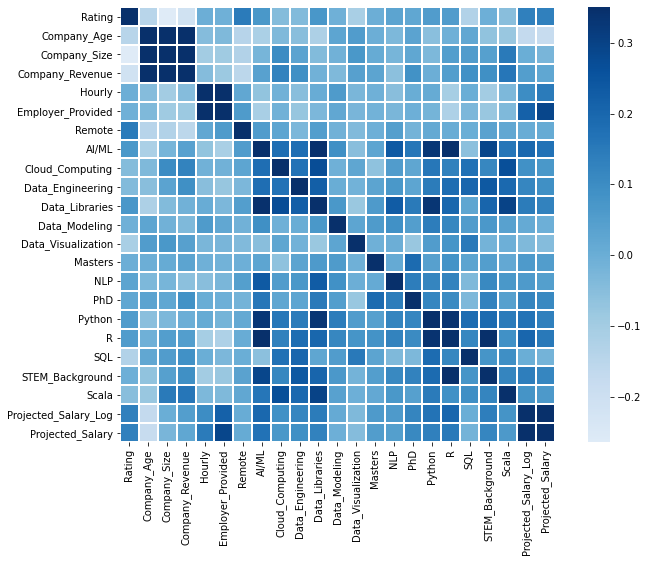

In [5]:
# run a quick heatmap to spot any coorelation with salary
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), center=0, cmap='Blues', square=True, linewidth=-1, vmax=.35);

It looks as if 'Employer_Provided' the salary, 'AI/ML', if salary was provided as an 'Hourly' estimate and 'R' are the most correlated numerical features with 'Projected_Salary' in this prelimiary heatmap.

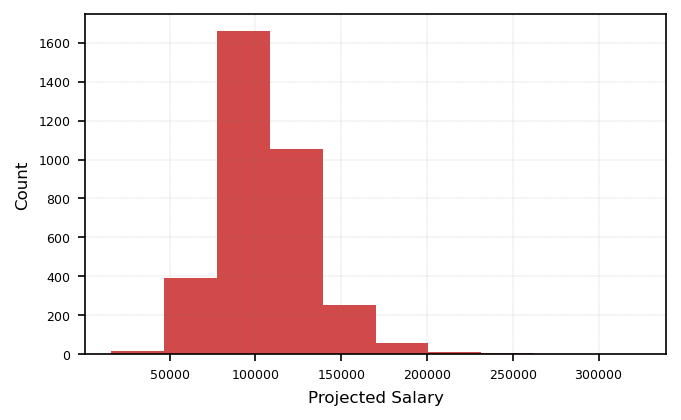

In [6]:
# check out a histogram of projected salary
plt.figure(figsize=(5,3), dpi=150)
plt.grid(color='#828181', linestyle='-.', linewidth=0.1)
plt.tick_params(labelsize=6)
plt.xlabel("Projected Salary", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.hist(df.Projected_Salary, color='#d14949');

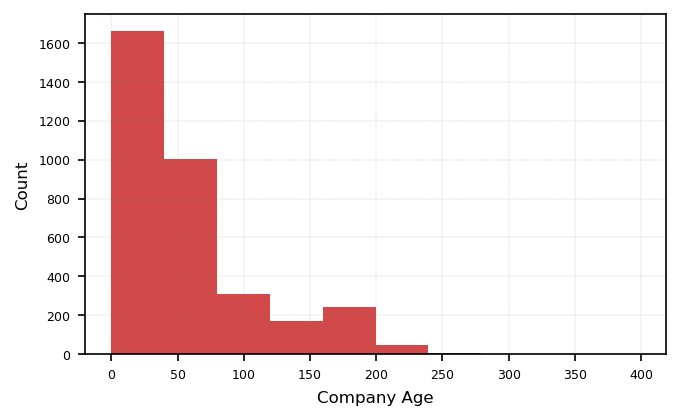

In [7]:
# plot hist of company age
plt.figure(figsize=(5,3), dpi=150)
plt.grid(color='#828181', linestyle='-.', linewidth=0.1)
plt.tick_params(labelsize=6)
plt.xlabel("Company Age", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.hist(df['Company_Age'], color='#d14949');

In [8]:
df['Projected_Salary'].describe()

count      3451.000000
mean     105475.079687
std       26403.660577
min       16000.000000
25%       89500.000000
50%      103000.000000
75%      118500.000000
max      324000.000000
Name: Projected_Salary, dtype: float64

In [9]:
df.Projected_Salary.median()

103000.0

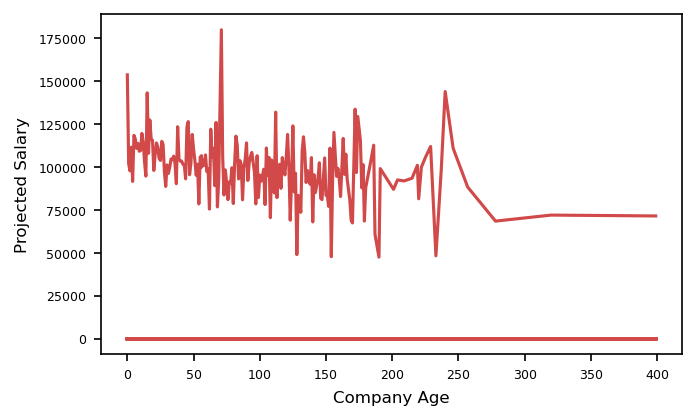

In [10]:
# line graph of mean salary by company age
mean_age = df.groupby(['Company_Age']).mean()
plt.figure(figsize=(5,3), dpi=150)
plt.tick_params(labelsize=6)
plt.xlabel("Company Age", fontsize=8)
plt.ylabel("Projected Salary", fontsize=8)
plt.plot(mean_age, color='#d14949');

Job_Category - Length: 6


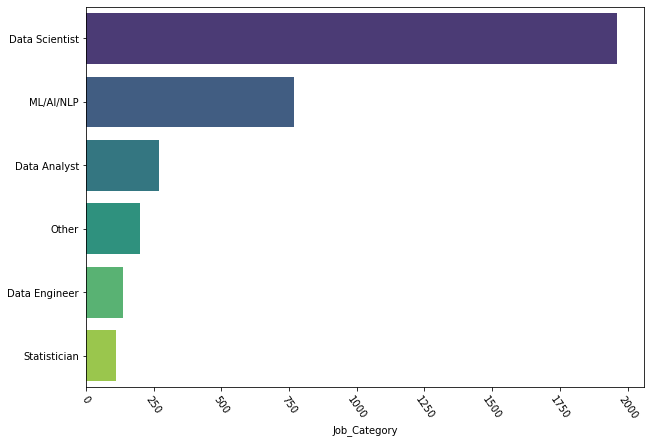

Seniority - Length: 3


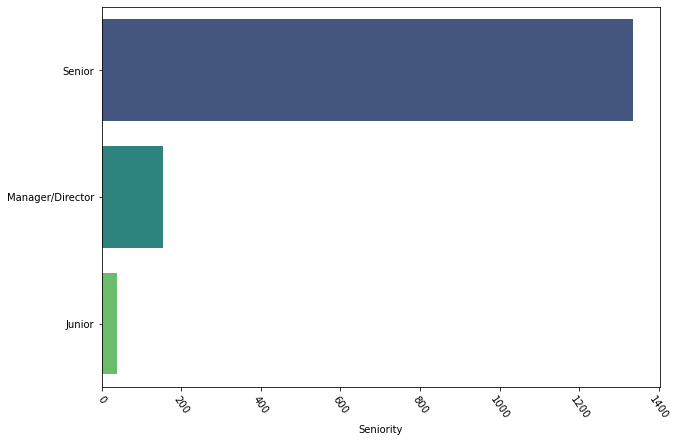

City - Length: 10


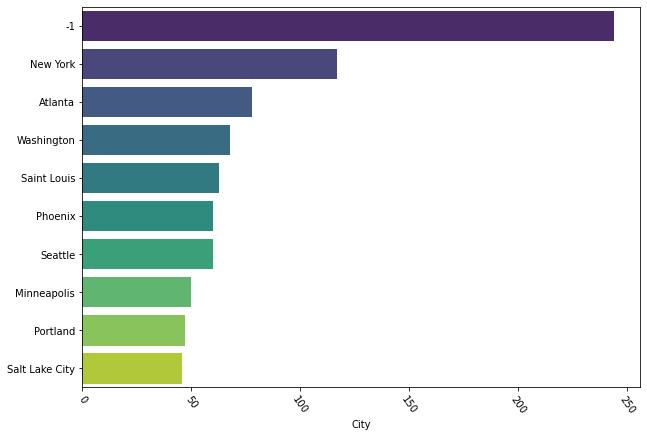

State - Length: 10


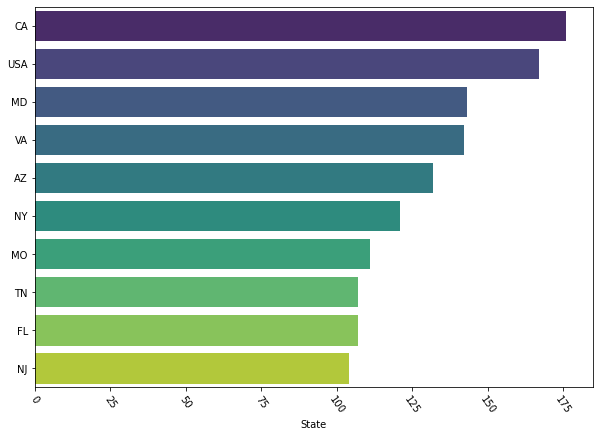

Region - Length: 10


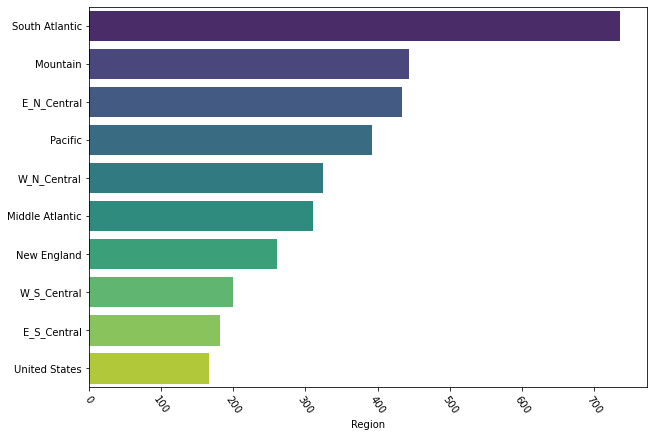

Company_Type - Length: 10


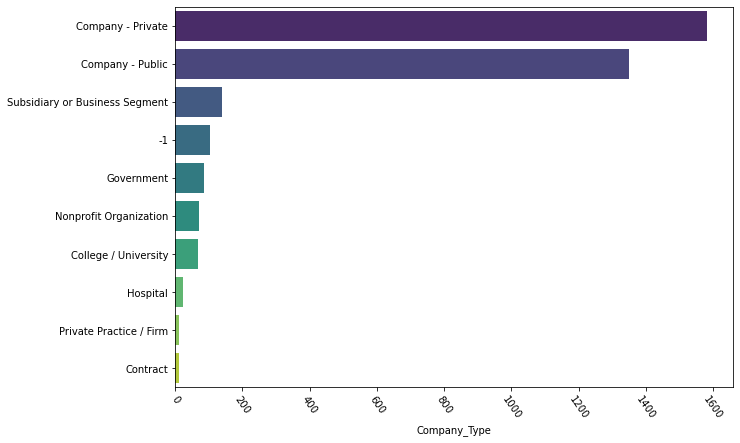

Company_Sector - Length: 10


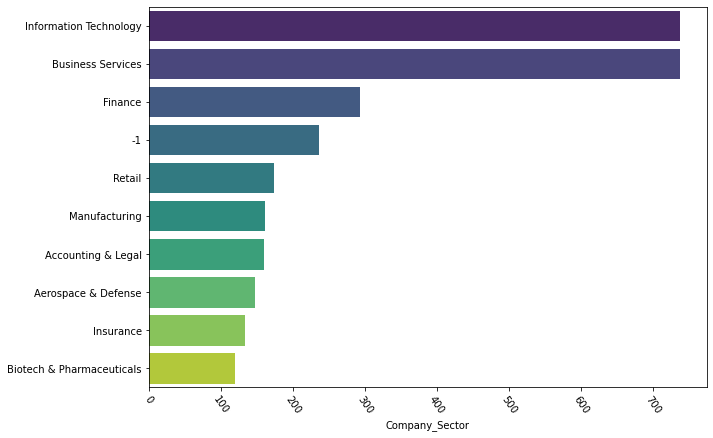

Company_Name - Length: 10


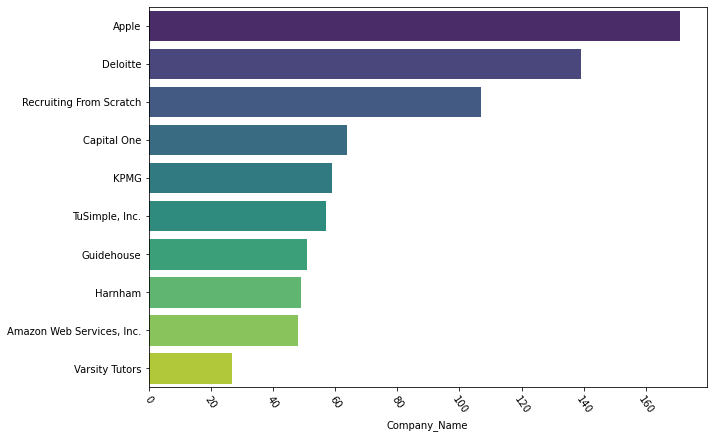

Company_Industry - Length: 10


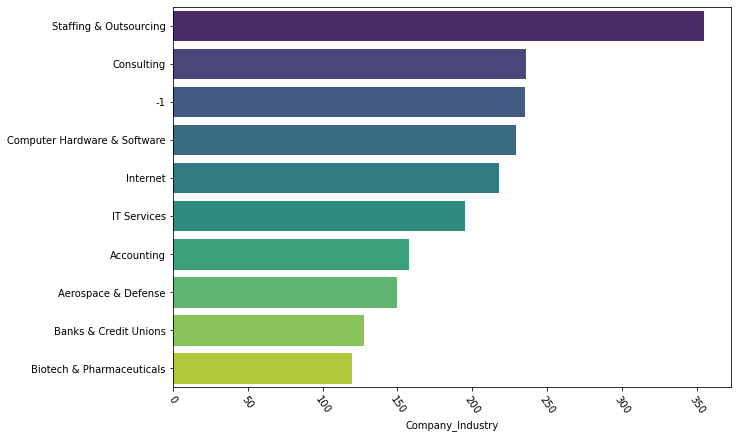

In [12]:
# run a series of bar plots to get a general sense of the data in the following columns
category_columns = df[['Job_Category', 'Seniority', 'City', 'State', 'Region', 'Company_Type', 'Company_Sector',
       'Company_Name', 'Company_Industry']]
for i in category_columns:
    plt.figure(figsize=(10,7))
    category_counts = df[i].value_counts()[:10]
    print(i, "- Length:", len(category_counts))
    sns.barplot(x=category_counts, y=category_counts.index, palette='viridis')
    plt.xticks(rotation=305)
    plt.show()

In [13]:
# run a series of pivot tables to see relationships
pd.pivot_table(df, index=['Job_Category', 'Seniority'], values='Projected_Salary')

Projected_Salary
Job_Category   Seniority                         
Data Analyst   Junior                70500.000000
               Senior                85162.037037
Data Engineer  Junior                79500.000000
               Manager/Director     132307.692308
               Senior               109372.340426
Data Scientist Junior                92031.250000
               Manager/Director     122943.750000
               Senior               119175.000000
ML/AI/NLP      Junior                77500.000000
               Manager/Director     106515.625000
               Senior               112186.629526
Other          Junior                69000.000000
               Manager/Director     108655.172414
               Senior               112992.537313
Statistician   Junior                73000.000000
               Manager/Director     130500.000000
               Senior               107596.153846

In [14]:
pd.pivot_table(df, index=['Company_Name'], values='Projected_Salary').sort_values('Projected_Salary', ascending=False)[:20]

,Projected_Salary
Company_Name,
Chipton-Ross,324000.0
ArthurPaige,215000.0
Gauss Labs,205000.0
Braintrust,197500.0
Erias Ventures LLC,197500.0
Human Interest,192500.0
Harnham US,190000.0
"Prodigy One, LLC",185500.0
B4CORP,182500.0


In [15]:
pd.pivot_table(df, index=['Region'], values='Projected_Salary').sort_values('Projected_Salary', ascending=False)

,Projected_Salary
Region,
Pacific,124742.346939
United States,118191.616766
Middle Atlantic,116200.000000
New England,108509.578544
South Atlantic,105528.532609
W_S_Central,98902.010050
Mountain,98262.387387
E_N_Central,97906.682028
E_S_Central,95502.747253


In [16]:
pd.pivot_table(df[df['Job_Category'] != 'Data Analyst'], index=['Company_Age'], values='Projected_Salary', aggfunc='mean').sort_values('Projected_Salary', ascending=False)[:10]

,Projected_Salary
Company_Age,
71.0,180000.000000
0.0,153750.000000
15.0,144910.000000
240.0,144000.000000
172.0,133750.000000
112.0,132000.000000
46.0,130854.838710
174.0,129500.000000
17.0,127450.000000


In [17]:
pd.pivot_table(df[df['Job_Category'] == 'Data Analyst'], index=['State'], values='Projected_Salary').sort_values('Projected_Salary', ascending=False)[:10]

,Projected_Salary
State,
CA,135500.000000
AK,125500.000000
USA,110875.000000
NH,105750.000000
CO,98857.142857
MA,98285.714286
VA,96166.666667
DC,93500.000000
KS,93000.000000


In [18]:
df_pivots = df[['Job_Category', 'Seniority', 'State', 'Region', \
           'Company_Size', 'Company_Type', 'Company_Sector', \
           'Company_Revenue', 'Hourly', 'Employer_Provided', 'Remote', \
           'AI/ML', 'Cloud_Computing', 'Data_Engineering', \
           'Data_Libraries', 'Data_Modeling', 'Data_Visualization', 'Masters', \
           'NLP', 'PhD', 'Python', 'R', 'SQL', 'STEM_Background', 'Scala']]

In [19]:
# NOTE TO FUTURE SELF: can't have 'projected_salaries' in df_pivots, \
# otherwise it will return a value error \
# because it will have assigned same values into both \
# for loop to check out a series of pivot table relationships \
for i in df_pivots.columns:
    print(pd.pivot_table(df, index=i, values='Projected_Salary').sort_values('Projected_Salary', ascending=False))

                Projected_Salary
Job_Category                    
Data Scientist     109172.018349
ML/AI/NLP          108287.662338
Data Engineer      107693.430657
Other               98327.500000
Statistician        87824.324324
Data Analyst        82101.476015
                  Projected_Salary
Seniority                         
Manager/Director     117712.903226
Senior               110911.610487
Junior                88564.102564
       Projected_Salary
State                  
CA        134448.863636
WA        130764.705882
NY        129095.041322
USA       118191.616766
MA        117522.727273
CO        113739.361702
VA        111119.718310
IL        110789.772727
MD        110458.041958
TX        109700.000000
GA        109588.541667
NJ        109581.730769
ID        108760.869565
NH        108236.842105
CT        107057.894737
DC        106588.235294
OR        106237.500000
PA        105941.176471
VT        105700.000000
NC        103226.315789
AK        102571.428571
RI       

In [20]:
# Keep this here as an example of how to use the aggfunc in future projects
# pd.pivot_table(df, index=['State', 'Job_Category'], values='Projected_Salary', aggfunc='count').sort_values('State') - how to use count func